In this Notebook I have implemented Scratch Implementations of Logistic Regression using Gradient Descent Algorithm and also Regularized Logistic Regression. The main motive for including scratch implementations but not scikit libraries were

<ul>
    <li> Understand how gradient descent minimizes the cost function to give optimal solution </li>
    <li> Visualise how change in learning rate affects the training time </li>
    <li> Get a better intuition of bias-variance tradeoff by changing the regularization parameter and the cutoff threshold </li>
    </ul>




<b> Dataset </b>
We have the customer data for a telecom company which offers many services like phone, internet, TV Streaming and Movie Streaming. The Goal is to predict whether or not a particular customer is likely to retain services. This is represented by the Churn column in dataset. Churn=Yes means customer leaves the company, whereas Churn=No implies customer is retained by the company.



In [ ]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
churndata = pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
churndata.head()
churndata.columns

In [ ]:
#Converting the Yes- No volumn to a binary column
churndata.Churn = churndata.Churn.map(dict(Yes=1,No=0))

Since its a convention to do some exploratory data analysis before modeling, lets do some graph plotting

In [ ]:
gender_tab = pd.crosstab(churndata.gender,churndata.Churn,normalize=True)
print(gender_tab)
gender_tab.plot(kind="bar",stacked=True)

#This graph proves that Gender has not much impact on churn, since an equivalent number of cusotmers churn for each category 

In [ ]:
senior_citizen_tab = pd.crosstab(churndata.SeniorCitizen,churndata.Churn,normalize=True)
print(senior_citizen_tab)
senior_citizen_tab.plot(kind="bar",stacked=True)

#This Graph shows that a higher properion of customers churn in case of senior citizens

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(15)
#Similarly we can make Graph for Other Categorical Variables as well
partner_tab = pd.crosstab(churndata.Partner,churndata.Churn,normalize=True)
partner_tab.plot(kind="bar",stacked=True,layout=(2,3),ax=axes[0,0])

phoneservice_tab = pd.crosstab(churndata.PhoneService,churndata.Churn,normalize=True)
phoneservice_tab.plot(kind="bar",stacked=True,layout=(2,3),ax=axes[0,1])

multiplelines_tab = pd.crosstab(churndata.MultipleLines,churndata.Churn,normalize=True)
multiplelines_tab.plot(kind="bar",stacked=True,layout=(2,3),ax=axes[0,2])

internetservice_tab = pd.crosstab(churndata.InternetService,churndata.Churn,normalize=True)
internetservice_tab.plot(kind="bar",stacked=True,layout=(2,3),ax=axes[1,0])

OnlineSecurity_tab = pd.crosstab(churndata.OnlineSecurity,churndata.Churn,normalize=True)
OnlineSecurity_tab.plot(kind="bar",stacked=True,layout=(2,3),ax=axes[1,1])

OnlineBackup_tab = pd.crosstab(churndata.OnlineBackup,churndata.Churn,normalize=True)
OnlineBackup_tab.plot(kind="bar",stacked=True,ax=axes[1,2])

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(15)

DeviceProtection_tab = pd.crosstab(churndata.DeviceProtection,churndata.Churn,normalize=True)
DeviceProtection_tab.plot(kind="bar",stacked=True,ax=axes[0,0])

TechSupport_tab = pd.crosstab(churndata.TechSupport,churndata.Churn,normalize=True)
TechSupport_tab.plot(kind="bar",stacked=True,ax=axes[0,1])

StreamingTV_tab = pd.crosstab(churndata.StreamingTV,churndata.Churn,normalize=True)
StreamingTV_tab.plot(kind="bar",stacked=True,ax=axes[0,2])

StreamingMovies_tab = pd.crosstab(churndata.StreamingMovies,churndata.Churn,normalize=True)
StreamingMovies_tab.plot(kind="bar",stacked=True,ax=axes[1,0])

Contract_tab = pd.crosstab(churndata.Contract,churndata.Churn,normalize=True)
Contract_tab.plot(kind="bar",stacked=True,ax=axes[1,1])

PaperlessBilling_tab = pd.crosstab(churndata.PaperlessBilling,churndata.Churn,normalize=True)
PaperlessBilling_tab.plot(kind="bar",stacked=True,ax=axes[1,2])

PM_tab = pd.crosstab(churndata.PaymentMethod,churndata.Churn,normalize=True)
PM_tab.plot(kind="bar",stacked=True)


Based on the information we can say that gender is not a significant variable for churn and is also correalted with others, so we can drop it.

In [ ]:
#Since we want to retreive dummy variables from the 
pd.factorize(churndata['SeniorCitizen'])
pd.factorize(churndata['Dependents'])
pd.factorize(churndata['PhoneService'])
pd.factorize(churndata['MultipleLines'])
pd.factorize(churndata['InternetService'])
pd.factorize(churndata['OnlineSecurity'])
pd.factorize(churndata['OnlineBackup'])
pd.factorize(churndata['DeviceProtection'])
pd.factorize(churndata['TechSupport'])
pd.factorize(churndata['StreamingTV'])
pd.factorize(churndata['StreamingMovies'])
pd.factorize(churndata['Contract'])
pd.factorize(churndata['PaperlessBilling'])
pd.factorize(churndata['PaymentMethod'])

In [ ]:
# Next we take all the categorrical variables and convert them dummy variables
cat_vars = ['SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(churndata[var], prefix=var,drop_first=True)
    data1=churndata.join(cat_list)
    churndata=data1


In [ ]:
churndata.columns

In [ ]:
training_features = ['SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes','MonthlyCharges','tenure']

In [ ]:
X = churndata[training_features]
y = churndata['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Logistic Regression from scratch

Source: This excellent Medium article <href> https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac </href>

<b>Algorithm</b>
Given a input X, we calculate the probability of customer churning. Then an appropriate threshold is decided, if the probability is higher than this threshold we consider that the customer will churn, else will not churn

<b> Hypothesis function </b> A sigmoid hypothesis function is chosen
<img src='https://cdn-images-1.medium.com/max/800/1*HXCBO-Wx5XhuY_OwMl0Phw.png'>
<b> Loss Function </b> To measure the performance of algorithm at each step, we define the following loss function.
<img src='https://cdn-images-1.medium.com/max/800/1*FdxEs8Iv_43Q8calTCjnow.png'>
<b> Gradient Descent </b> At each iteration of the algorithm we take the gradient of the loss function and based on that update the weights
<img src='https://cdn-images-1.medium.com/max/800/1*gobKgGbRWDAoVFAan_HjxQ.png'>

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
        
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [ ]:
model = LogisticRegression(lr=0.001, num_iter=10000)
%time model.fit(X_train,y_train)

model.theta

In [ ]:
#We test the model accuracy with a threshold of 0.5
preds = model.predict(X_test,.5)
# accuracy
(preds == y_test).mean()

#Thus we can see that the Logistic regression model has an accuracy of about 79.4%

# Regularized Logistic Regression from Scratch

In this case we add a regularization term to the loss function such that the new loss function is defined as follows
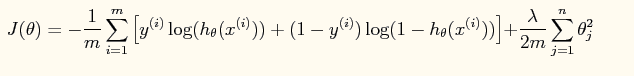

In [ ]:
class RegularizedLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False,reg=10):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.reg = reg
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * (gradient + self.reg*self.theta/y.size)
            
        
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [ ]:
model = RegularizedLogisticRegression(lr=0.001, num_iter=10000,reg=100)
%time model.fit(X_train,y_train)

model.theta

In [ ]:
preds = model.predict(X_test,.5)
# accuracy
(preds == y_test).mean()

#Thus we can see that the regularized Logistic regression model has an accuracy of about 79.2%

# Comparing results with the Scikit Learn Logistic Regression Libraries

As a final part of this notebook, I try to use the k-fold cross validated Logistic Regression from scikit-learn library and compare the results with the scratch implementation.

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
